# 6.2 Exploring relationships

## This script contains the following:
###  Importing Visualization Libraries and Data
###  Exploring Relationships
   #### Correlations
   #### Scatterplots
   ####  Pair Plots
   #### Categorical Plots
### Research Questions and Hypothesis

##   Importing Visualization Libraries and Data

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
#Checking matplotlib version
matplotlib.__version__

'3.5.2'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Project folder path
path = r'C:\Users\BhuwanDhakal\Sunita\Projects\2 Data Immersion\Advanced analytics $ Dashboard Desigh\Online Shopping Analysis'


In [6]:
path

'C:\\Users\\BhuwanDhakal\\Sunita\\Projects\\2 Data Immersion\\Advanced analytics $ Dashboard Desigh\\Online Shopping Analysis'

In [7]:
# Importing Online Shopping cleaned Dataframe 
df = pd.read_excel(os.path.join(path, 'Data', 'Prepared Data', 'Cleaned_Data.xlsx'))

##  Exploring Relationship

In [8]:
df.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_ID,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,TAX,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
1,17850.0,M,Chicago,12,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
2,17850.0,M,Chicago,12,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
3,17850.0,M,Chicago,12,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10
4,17850.0,M,Chicago,12,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2019-01-01,4500,2424.5,1,ELEC10,10


### Create a correlation heatmap using seaborn:

In [9]:
#Check column names
df.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_ID', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'TAX', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [10]:
# Create a subset excluding the 'ID', 'Date' and 'Index' columns

sub = df[['Tenure_Months','Quantity', 'Avg_Price','Delivery_Charges','TAX','Offline_Spend','Online_Spend','Discount_pct']]

In [11]:
sub

,Tenure_Months,Quantity,Avg_Price,Delivery_Charges,TAX,Offline_Spend,Online_Spend,Discount_pct
0,12,1,153.71,6.5,0.10,4500,2424.50,10
1,12,1,153.71,6.5,0.10,4500,2424.50,10
2,12,2,122.77,6.5,0.10,4500,2424.50,10
3,12,1,81.50,6.5,0.10,4500,2424.50,10
4,12,1,153.71,6.5,0.10,4500,2424.50,10
...,...,...,...,...,...,...,...,...
52919,8,1,250.00,0.0,0.05,2500,1294.22,30
52920,34,1,25.00,0.0,0.05,2000,1066.12,30
52921,15,1,10.80,6.0,0.05,3000,2230.76,10
52922,15,1,9.60,6.0,0.05,3000,2230.76,10


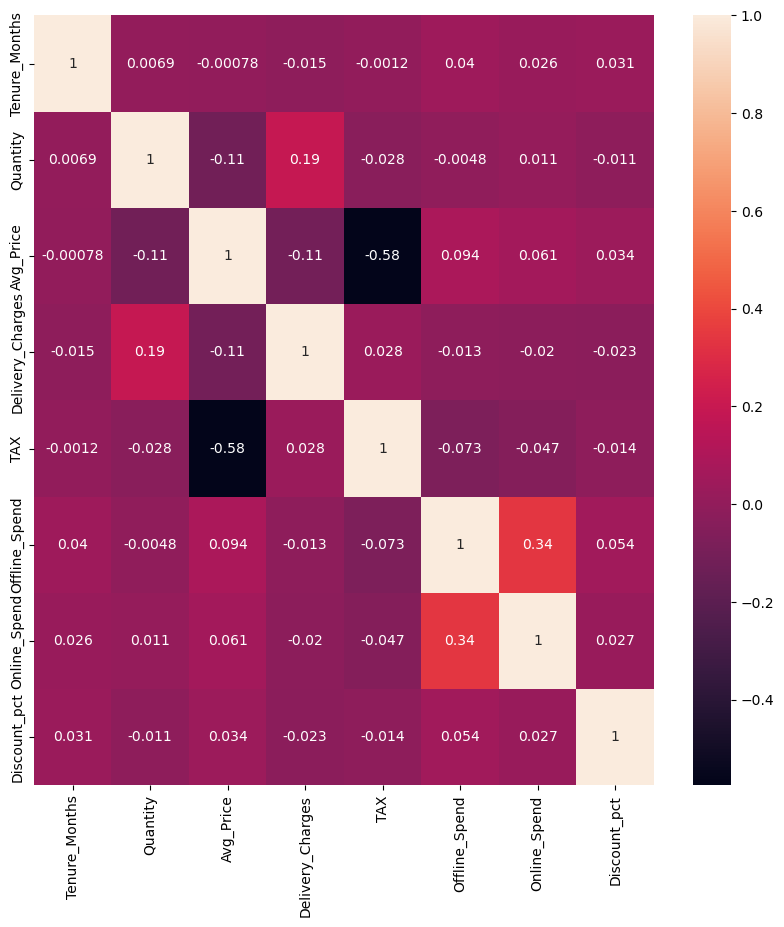

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

## Discussion

- Most of the variables in the dataset have weak positive or negative relationship with each other
- The highest positive correlation is 0.34 between Online Spend and Offline spend indicating that who spend more offline also spend more online
- The highest negative correlation is between Tax and Average Price indicating the tax rate is lower as the average price of the product increases
- There is some positive relationship between delivery charge and the quantity indicating higher the amount purchased more the delivery charges will be

## Scatterplots:

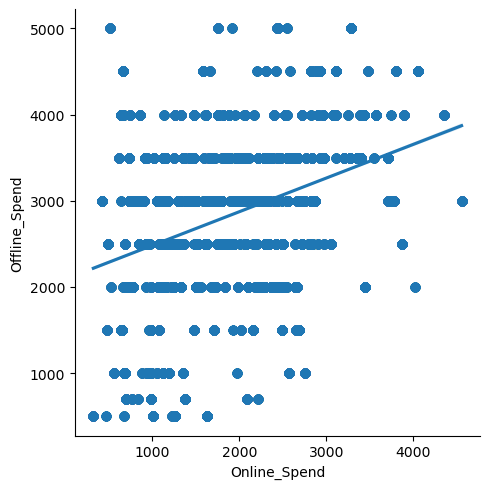

In [13]:
# Create a scatterplot for the "Online_spend" and "Offline_spend" columns in seaborn
sns.lmplot(x = 'Online_Spend', y = 'Offline_Spend', data = df)

## Pair Plot

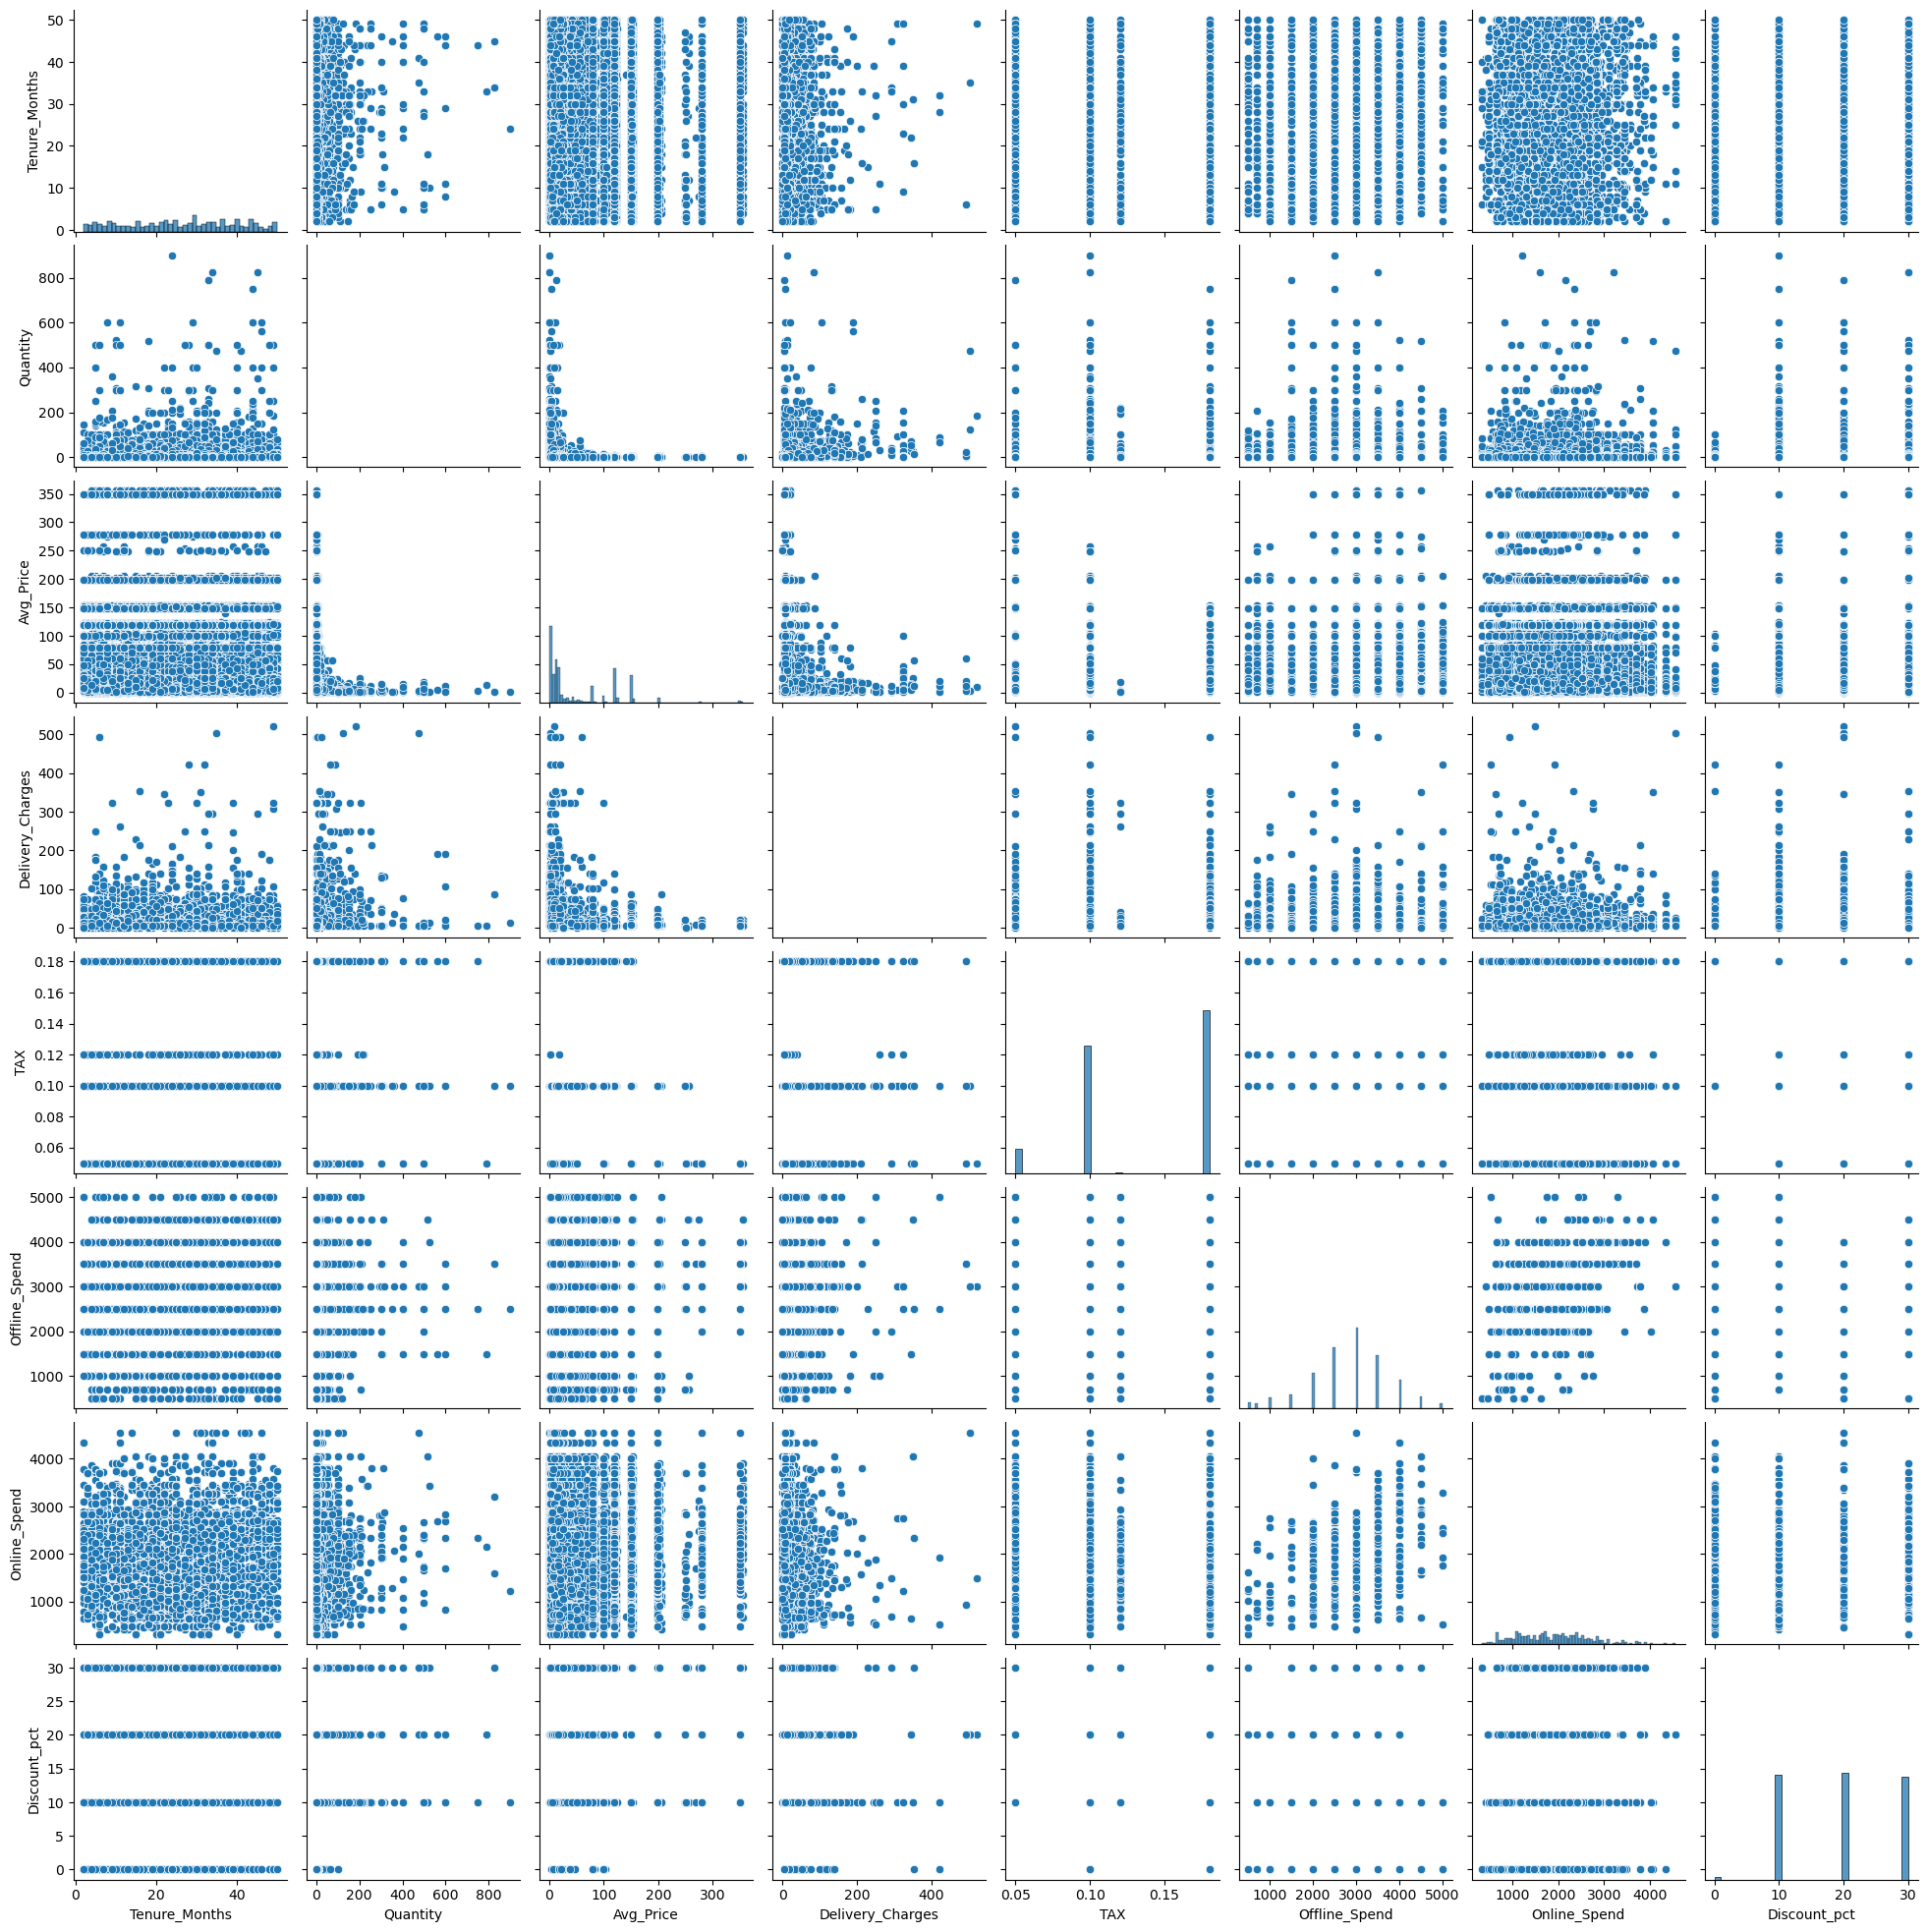

In [14]:
# Creating pair plot of entire dataset

g = sns.pairplot(sub)

In [15]:
#Creating a subset of the variables that have stronger relationship

sub_2 = df[['Delivery_Charges','Quantity', 'Avg_Price', 'Tenure_Months', 'Online_Spend', 'Offline_Spend']]

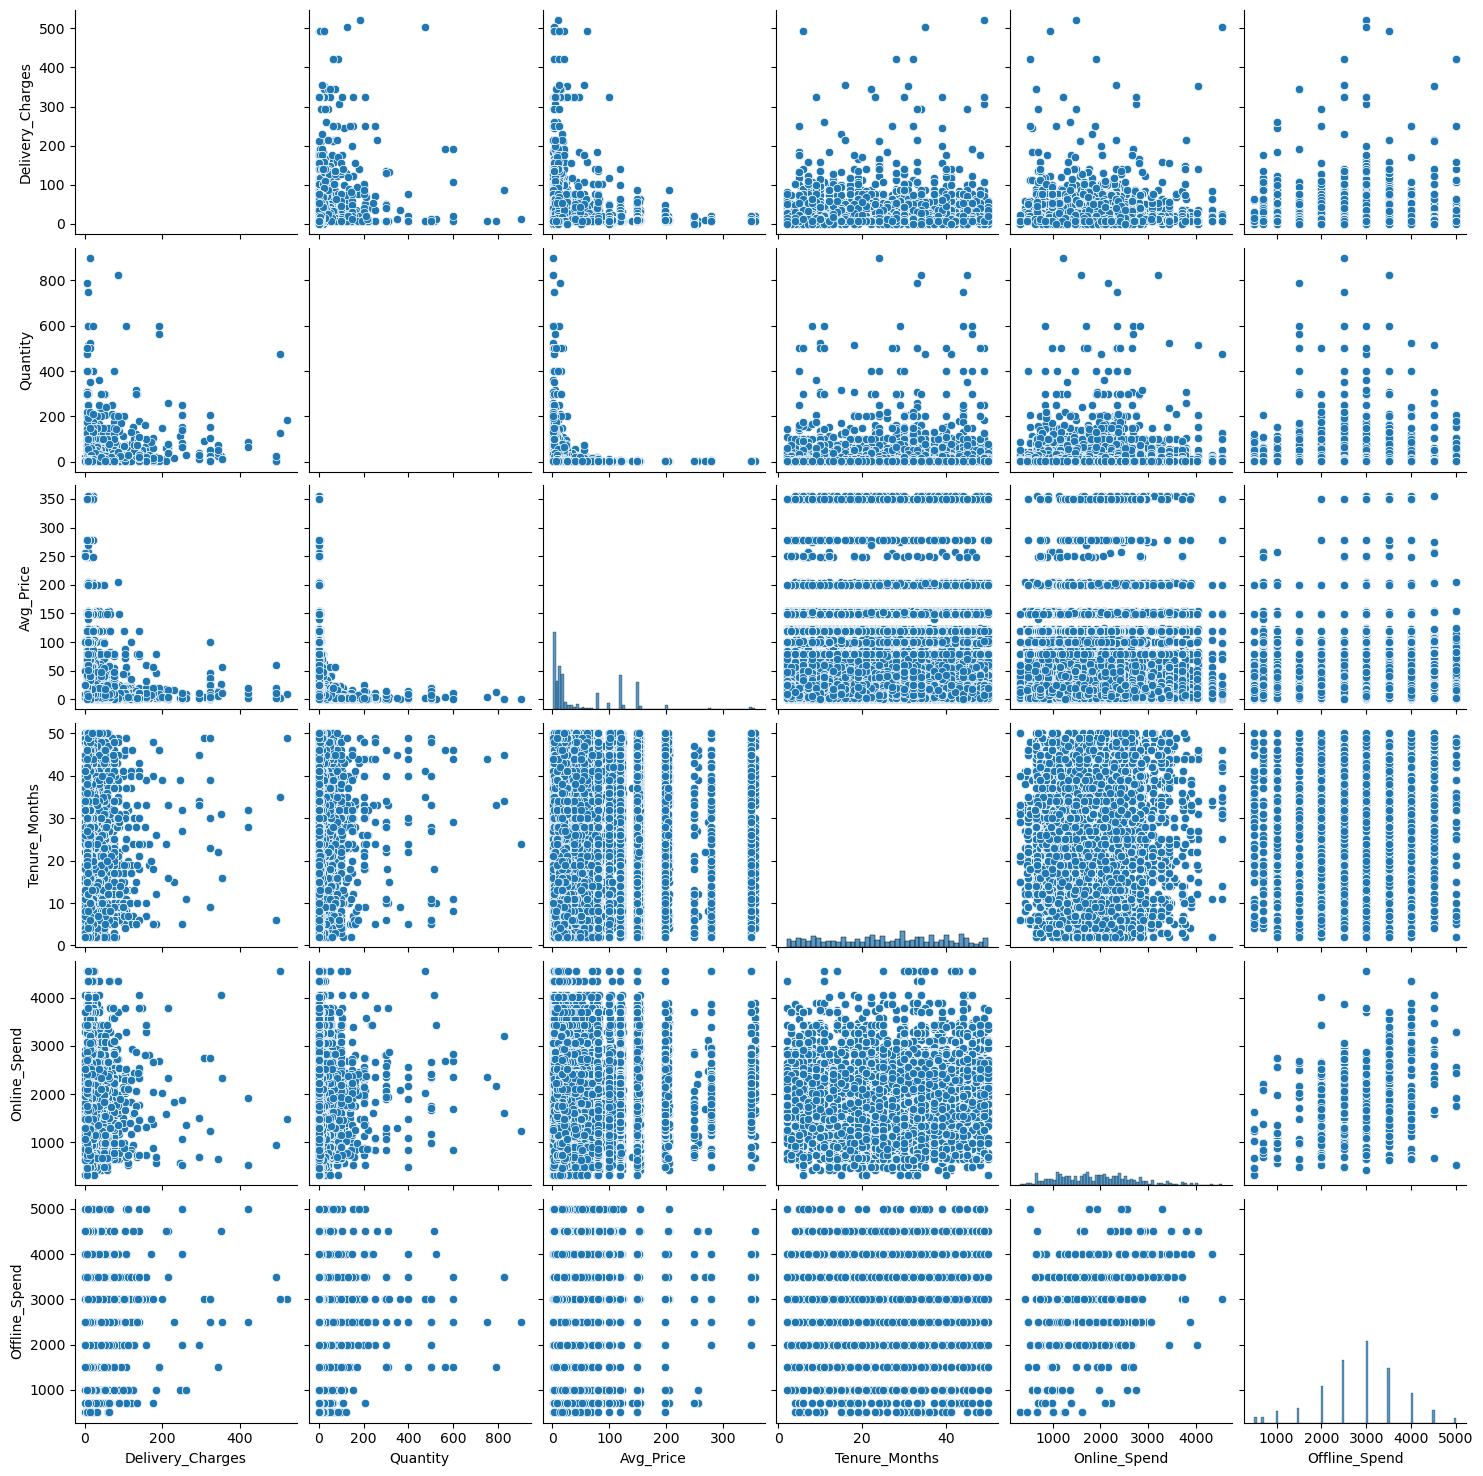

In [16]:
pairplot_2 = sns.pairplot(sub_2)

## Discussion
- Pair plots show different kinds of relationship between the variables. 
- Looking at the chart, it is not really helpful in identfying the relationship between the variables
- Some of the variables have outliers while others have linear relations

<AxesSubplot:xlabel='Online_Spend', ylabel='Count'>

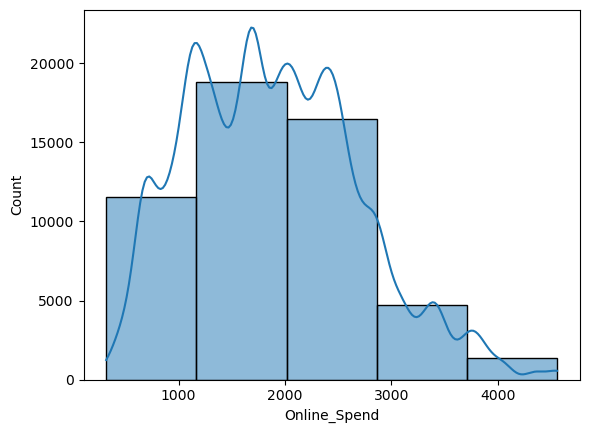

In [17]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Online_Spend'], bins = 5, kde = True)

## Categorical plot

In [18]:
# Creating score category for categorical plot
df.loc[df['Online_Spend'] < 1500, 'Spend category'] = 'Low Spend'

In [19]:
df.loc[(df['Online_Spend'] >= 1500) & (df['Online_Spend'] < 2500), 'Spend category'] = 'Middle Spend'

In [20]:
df.loc[df['Online_Spend'] >= 2500, 'Spend category'] = 'High Spend'

In [21]:
df['Spend category'].value_counts(dropna = False)

Middle Spend    22607
Low Spend       18734
High Spend      11583
Name: Spend category, dtype: int64

In [22]:
sub.columns

Index(['Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'TAX',
       'Offline_Spend', 'Online_Spend', 'Discount_pct'],
      dtype='object')

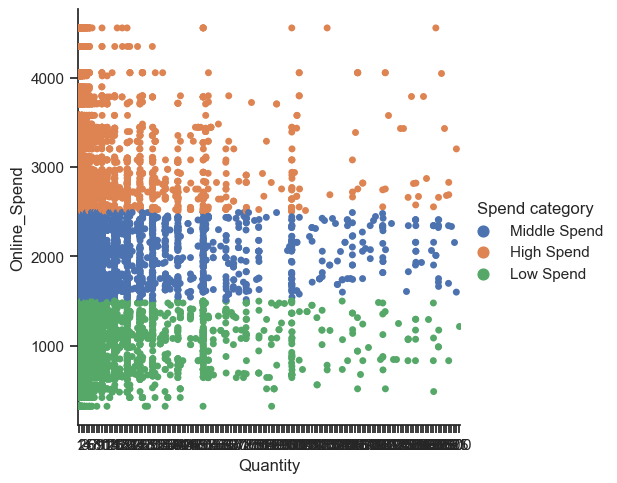

In [23]:
# Creating categorical plot with Quantity
sns.set(style="ticks")
plot_Quantity = sns.catplot(x='Quantity', y='Online_Spend', hue="Spend category", data=df)

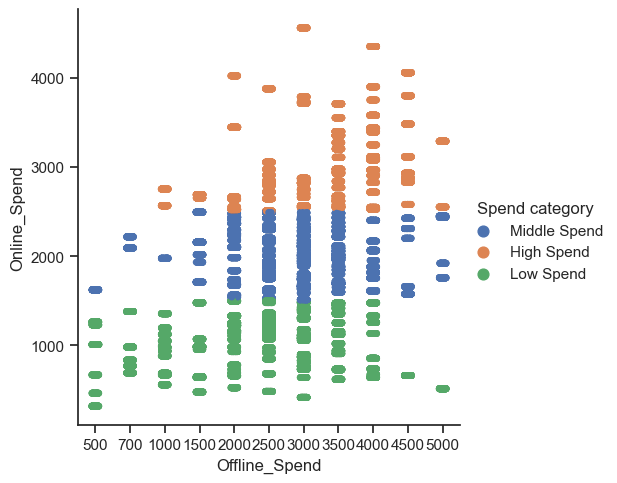

In [24]:
# Creating categorical plot with Offline_Spend
sns.set(style="ticks")
plot_Offline = sns.catplot(x='Offline_Spend', y='Online_Spend', hue="Spend category", data=df)

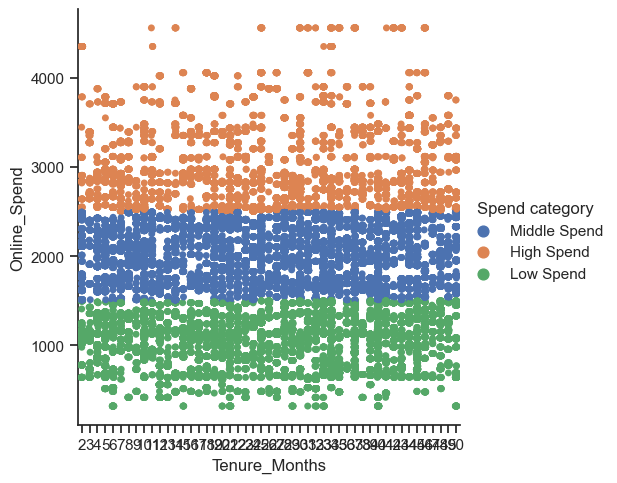

In [25]:
# Creating categorical plot with Tenure_Months
sns.set(style="ticks")
plot_Tmonth = sns.catplot(x='Tenure_Months', y='Online_Spend', hue="Spend category", data=df)

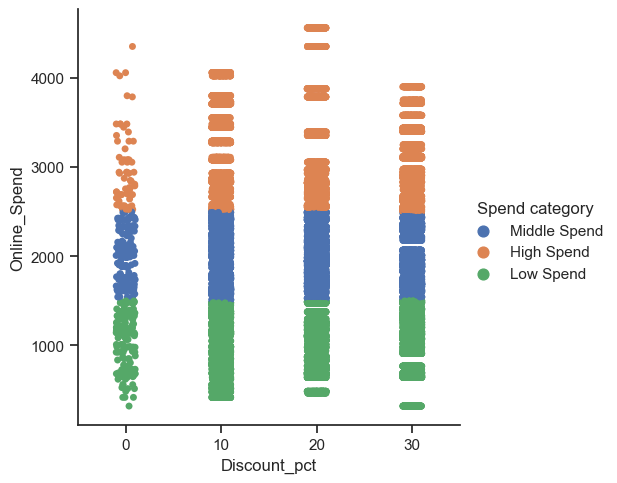

In [26]:
# Creating categorical plot with Discount_pct
sns.set(style="ticks")
plot_Discount_pct = sns.catplot(x='Discount_pct', y='Online_Spend', hue="Spend category", data=df)

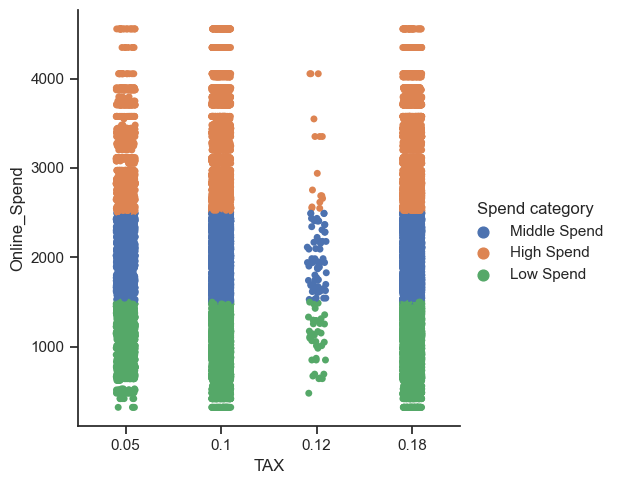

In [27]:
# Creating categorical plot with TAX
sns.set(style="ticks")
plot_TAX = sns.catplot(x='TAX', y='Online_Spend', hue="Spend category", data=df)

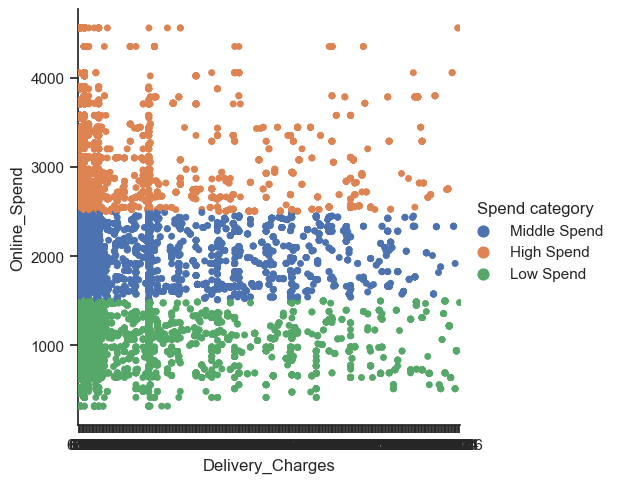

In [28]:
# Creating categorical plot with Delivery_Charges
sns.set(style="ticks")
plot_Delivery_Charges = sns.catplot(x='Delivery_Charges', y='Online_Spend', hue="Spend category", data=df)

## Discussion

- Through the categorical plot by counting the transaction based on online spend, we categorized low spenders (<1500 USD), medium --spenders (>=1500 USD and < 2500 USD), and high spenders (>= 2500 USD)
- The categorical plot didn't give us clear picture what factors affect the online spending habit.
- The only thing that might be indicative is that there are more low spenders than high spenders when the discount percent is low or none

# Research Questions and Hypothesis

In the previous exercise, I didn't ask any questions related to offline spending, but I think it might be better to look in how the offline spending amount affects the online spending amount. So, I want to add the following question

- How offline spending affects the online spending of the customers?  

My hypothesis for this exercise will be People will spend more online if the average price is low, delivery charges is low, and the discount percent is high. 

- Null Hypothesis: Average price of the product, delivery charges and the discount percent will not affect customer's online spend
- Alternate Hypothesis : Average price of the product, delivery charges and the discount percent will impact customer's online spend